<a href="https://colab.research.google.com/github/Darshini5/C/blob/main/AIC_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/harrison8989/recolorizer.git

Cloning into 'recolorizer'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 172 (delta 3), reused 1 (delta 0), pack-reused 163 (from 1)
Receiving objects: 100% (172/172), 748.16 KiB | 9.72 MiB/s, done.
Resolving deltas: 100% (88/88), done.


In [ ]:
%cd recolorizer

/content/recolorizer


In [ ]:
!pip install tensorflow keras opencv-python scikit-image matplotlib

In [ ]:
from google.colab import files
import os

os.makedirs("data/train", exist_ok=True)

uploaded = files.upload()  # Choose all your training JPG files

# Move them to data/train
import shutil
for filename in uploaded.keys():
    shutil.move(filename, "data/train/" + filename)

!ls data/train  # Verify files


Saving COLOR1.jpg to COLOR1.jpg
Saving COLOR2.jpg to COLOR2.jpg
Saving download (1).jpg to download (1).jpg
Saving download (2).jpg to download (2).jpg
Saving download (3).jpg to download (3).jpg
Saving download (4).jpg to download (4).jpg
Saving download (5).jpg to download (5).jpg
Saving download (6).jpg to download (6).jpg
Saving download (7).jpg to download (7).jpg
Saving download (8).jpg to download (8).jpg
Saving download (9).jpg to download (9).jpg
Saving download (10).jpg to download (10).jpg
Saving download (11).jpg to download (11).jpg
Saving download (12).jpg to download (12).jpg
Saving download (13).jpg to download (13).jpg
Saving download (14).jpg to download (14).jpg
Saving download (15).jpg to download (15).jpg
Saving download (16).jpg to download (16).jpg
Saving download (17).jpg to download (17).jpg
Saving download (18).jpg to download (18).jpg
Saving download.jpg to download.jpg
Saving images (1).jpg to images (1).jpg
Saving images (2).jpg to images (2).jpg
Saving ima

In [ ]:
# ===============================
# 📌 Cell 2: Prepare Dataset
# ===============================

import os
import cv2
import numpy as np

DATA_DIR = "data/train"       # Folder with color images
SAVE_DIR = "data/processed"
os.makedirs(SAVE_DIR, exist_ok=True)

for file in os.listdir(DATA_DIR):
    if file.endswith(".jpg"):
        img = cv2.imread(os.path.join(DATA_DIR, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img, (128,128))

        # Grayscale input
        gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY) / 255.0
        # Color output normalized
        color = img_resized / 255.0

        np.save(os.path.join(SAVE_DIR, "gray_" + file[:-4] + ".npy"), gray)
        np.save(os.path.join(SAVE_DIR, "color_" + file[:-4] + ".npy"), color)

print("Dataset prepared! Files saved in", SAVE_DIR)


Dataset prepared! Files saved in data/processed


In [ ]:
# ===============================
# 📌 Cell 3: CNN Model
# ===============================

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, BatchNormalization, Activation
from tensorflow.keras.models import Model

def build_colorizer():
    inputs = Input(shape=(128,128,1))

    # Encoder
    x = Conv2D(64, (3,3), padding='same')(inputs)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3,3), strides=2, padding='same')(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    # Bottleneck
    x = Conv2D(256, (3,3), padding='same')(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    # Decoder
    x = UpSampling2D((2,2))(x)
    x = Conv2D(128, (3,3), padding='same')(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    x = Conv2D(64, (3,3), padding='same')(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    outputs = Conv2D(3, (1,1), activation='sigmoid', padding='same')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')

    return model

model = build_colorizer()
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64, 64, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 128, 128, 3)    │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 741,251 (2.83 MB)

 Trainable params: 739,971 (2.82 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [ ]:
# ===============================
# 📌 Cell 4: Load Data & Train
# ===============================

import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint

DATA_DIR = "data/processed"
files = [f for f in os.listdir(DATA_DIR) if f.startswith("gray_")]

X_train, Y_train = [], []

for f in files:
    gray = np.load(os.path.join(DATA_DIR, f))
    color = np.load(os.path.join(DATA_DIR, "color_" + f[5:]))
    X_train.append(gray[..., np.newaxis])
    Y_train.append(color)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

print("Training shapes:", X_train.shape, Y_train.shape)

checkpoint = ModelCheckpoint("cnn_colorizer.h5", save_best_only=True, monitor='loss')

model.fit(X_train, Y_train, epochs=50, batch_size=8, callbacks=[checkpoint])


Training shapes: (55, 128, 128, 1) (55, 128, 128, 3)
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.0951 

7/7 ━━━━━━━━━━━━━━━━━━━━ 73s 10s/step - loss: 0.0905
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.0214 

7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - loss: 0.0212
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - loss: 0.0200
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.0155

7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - loss: 0.0156
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - loss: 0.0175
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.0135

7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0135
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.0117

7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0119
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.0129

7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0129
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.0103

7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - loss: 0.0106
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0112
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0129
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - loss: 0.0184
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0156
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - loss: 0.0111
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.0117

7/7 ━━━━━━━━━━━━━━━━━━━━ 67s 10s/step - loss: 0.0117
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0115
Epoch 17/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0116
Epoch 18/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - loss: 0.0124
Epoch 19/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.0121

7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0120
Epoch 20/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.0103

7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0103
Epoch 21/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0118
Epoch 22/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.0103

7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - loss: 0.0103
Epoch 23/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0111
Epoch 24/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - loss: 0.0104
Epoch 25/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0107
Epoch 26/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0114
Epoch 27/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0103
Epoch 28/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.0091

7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - loss: 0.0092
Epoch 29/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0122
Epoch 30/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0135
Epoch 31/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - loss: 0.0096
Epoch 32/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0121
Epoch 33/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0096
Epoch 34/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0105
Epoch 35/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - loss: 0.0105
Epoch 36/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0123
Epoch 37/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - loss: 0.0111
Epoch 38/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0107
Epoch 39/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - loss: 0.0107
Epoch 40/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 67s 10s/step - loss: 0.0139
Epoch 41/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.0117

7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0115
Epoch 42/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - loss: 0.0102
Epoch 43/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.0084

7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0086
Epoch 44/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.0093

7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0094
Epoch 45/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0116
Epoch 46/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0126
Epoch 47/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - loss: 0.0117
Epoch 48/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - loss: 0.0099
Epoch 49/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - loss: 0.0128
Epoch 50/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.0089

7/7 ━━━━━━━━━━━━━━━━━━━━ 67s 10s/step - loss: 0.0090


In [ ]:
model.save("cnn_colorizer.keras")  # native Keras format
model = load_model("cnn_colorizer.keras")  # no warnings, no errors


In [ ]:
from tensorflow.keras.models import load_model

# Load the HDF5 model without compiling
model = load_model("cnn_colorizer.h5", compile=False)

print("Model loaded successfully ✅")


Model loaded successfully ✅


In [ ]:
print("AB_pred shape:", AB_pred.shape)


AB_pred shape: (128, 128, 2)


In [ ]:
# If AB_pred has shape (128,128,3), take only first two channels
AB_pred = AB_pred[:, :, :2]

# Now assign to LAB image
lab_out[:, :, 1:] = AB_pred


In [ ]:
# Predict AB channels
AB_pred = model.predict(L_input)
AB_pred = AB_pred[0] * 128  # denormalize

print("AB_pred shape before slicing:", AB_pred.shape)

# Keep only 2 channels (A & B)
if AB_pred.shape[2] > 2:
    AB_pred = AB_pred[:, :, :2]

# Reconstruct LAB image
lab_out = np.zeros((128, 128, 3), dtype=np.float32)
lab_out[:, :, 0] = L * 100
lab_out[:, :, 1:] = AB_pred

# Convert back to RGB
rgb_out = cv2.cvtColor(lab_out.astype(np.uint8), cv2.COLOR_LAB2BGR)
cv2.imwrite("output_colorized.png", rgb_out)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step
AB_pred shape before slicing: (128, 128, 3)


True

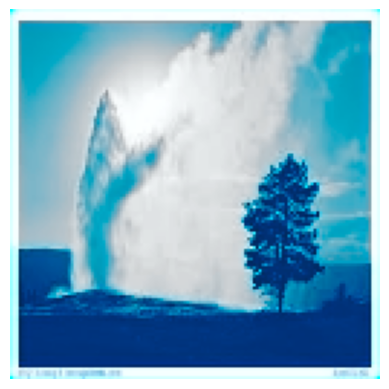

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(rgb_out, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
AB_pred = AB_pred * 128  # if model outputs in [-1,1]
lab_out[:, :, 1:] = AB_pred


In [ ]:
import cv2
import numpy as np

gray = cv2.imread("/data/BW1.jpg", cv2.IMREAD_GRAYSCALE)
L = gray.astype(np.float32) / 255.0  # normalize if model was trained on normalized data


AttributeError: 'NoneType' object has no attribute 'astype'